In [1]:
import pandas as pd
import ast
import matplotlib

from itertools import tee, combinations



### Import Data, Convert Durations to Ratios, add to DataFrame

In [2]:
results = pd.read_csv('https://raw.githubusercontent.com/RichardFreedman/CRIM-notebooks/master/CRIM/Mass_0001_01_Generic_Close_4_2.csv')

In [3]:
# converts strings to numbers and replaces these in the dataframe

results['Note_Durations'] = results['Note_Durations'].apply(ast.literal_eval)

durations = results['Note_Durations']

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def get_ratios(input_list):
    ratio_pairs = []
    for a, b in pairwise(input_list):
        ratio_pairs.append(b / a)
    return ratio_pairs
   

In [4]:
results["Duration_Ratios"] = results.Note_Durations.apply(get_ratios)
results.head(4)

,Pattern_Generating_Match,Pattern_matched,Piece_Title,Part,First_Note_Measure_Number,Last_Note_Measure_Number,Note_Durations,EMA,EMA_url,Duration_Ratios
0,"[-2, 2, 2, -2]","[-2, 2, 2, -2]",Missa Confitemini Kyrie,Superius,1,3,"[2.0, 4.0, 4.0, 3.0, 1.0]","1-3/1/@4.0-end,@start-end,@start-2.5",https://ema.crimproject.org/https%3A%2F%2Fcrim...,"[2.0, 1.0, 0.75, 0.3333333333333333]"
1,"[-2, 2, 2, -2]","[-3, 2, 2, -2]",Missa Confitemini Kyrie,Superius,13,14,"[4.0, 2.0, 2.0, 1.0, 1.0]","13-14/1/@1.0-end,@start-1.5",https://ema.crimproject.org/https%3A%2F%2Fcrim...,"[0.5, 1.0, 0.5, 1.0]"
2,"[-2, 2, 2, -2]","[-2, 2, 4, -2]",Missa Confitemini Kyrie,Contratenor,7,7,"[1.0, 1.0, 2.0, 1.0, 1.0]","7-7/2/@2.0-end,@start-4.5",https://ema.crimproject.org/https%3A%2F%2Fcrim...,"[1.0, 2.0, 0.5, 1.0]"
3,"[-2, 2, 2, -2]","[-3, 2, 2, -2]",Missa Confitemini Kyrie,Contratenor,11,12,"[4.0, 2.0, 2.0, 6.0, 1.0]","11-12/2/@1.0-end,@start-4.0",https://ema.crimproject.org/https%3A%2F%2Fcrim...,"[0.5, 1.0, 3.0, 0.16666666666666666]"


### Test of Compare Ratios with Sample Data

In [5]:
def compare_ratios_test (ratios_1, ratios_2):

    # subraction of lists 
    # using zip() + list comprehension 

    # initializing lists 
    ratios_1 = [3, 5, 2, 6, 4] 
    ratios_2 = [7, 3, 4, 1, 5] 

    # printing original lists 
    print ("The original list 1 is : " + str(ratios_1)) 
    print ("The original list 2 is : " + str(ratios_2)) 

    # division of lists 
    # using zip() + list comprehension 
    diffs = [i - j for i, j in zip(ratios_1, ratios_2)] 
    abs_diffs = [abs(ele) for ele in diffs] 
    sum_diffs = sum(abs_diffs)

    # printing result 
    print ("The difference list is : " + str(diffs)) 
    print ("The sum of absolute diffs is : " + str(sum_diffs)) 
    #return abs_diffs
    return sum_diffs
    
    

### And Run the Test

In [6]:
ratios_1 = [3, 5, 2, 6, 4] 
ratios_2 = [7, 3, 4, 1, 5] 

compare_ratios_test (ratios_1, ratios_2)




The original list 1 is : [3, 5, 2, 6, 4]
The original list 2 is : [7, 3, 4, 1, 5]
The difference list is : [-4, 2, -2, 5, -1]
The sum of absolute diffs is : 14


14

### Compare Ratios with Actual Data from CSV

In [7]:
# Here we group the rows in the DF by the Pattern Generating Match
# Each has its own string of durations, and duration ratios
# and then we compare the ratios to get the differences
# the "list(combinations)" method takes care of building the pairs, using data from our dataframe 'results'

def compare_ratios (ratios_1, ratios_2):
    
    ## division of lists 
    # using zip() + list comprehension 
    diffs = [i - j for i, j in zip(ratios_1, ratios_2)] 
    abs_diffs = [abs(ele) for ele in diffs] 
    sum_diffs = sum(abs_diffs)

    return sum_diffs
    
# this MUST be before the for loop, since it's used there.
matches = []

for name, group in results.groupby("Pattern_Generating_Match"):
    #print(name)
    #print(group)
    ratio_pairs = list(combinations(group.Duration_Ratios.values, 2))
    for a,b in ratio_pairs: 
        sum_diffs = compare_ratios(a,b)
        
        matches.append(
            {
                "Pattern_Generating_Match": name,
                "Duration_Ratio_1": a,
                "Duration_Ratio_2": b,
                "Sum_Diffs": sum_diffs
            }
        )


In [9]:
matches_df=pd.DataFrame(matches)
# could SORT by these!
matches_df[matches_df.Sum_Diffs == 2]

,Pattern_Generating_Match,Duration_Ratio_1,Duration_Ratio_2,Sum_Diffs
36,"[-2, -2, -2, 1]","[2.0, 1.0, 0.5, 8.0]","[1.0, 2.0, 0.5, 8.0]",2.0
85,"[-2, -2, -2, 1]","[1.0, 0.5, 1.0, 2.0]","[2.0, 0.5, 1.0, 3.0]",2.0
87,"[-2, -2, -2, 1]","[1.0, 0.5, 1.0, 2.0]","[1.0, 0.5, 1.0, 4.0]",2.0
97,"[-2, -2, -2, 1]","[1.0, 1.0, 1.0, 2.0]","[1.0, 1.0, 1.0, 4.0]",2.0
111,"[-2, -2, -2, 1]","[1.0, 0.5, 1.0, 2.0]","[2.0, 0.5, 1.0, 3.0]",2.0
...,...,...,...,...
3543,"[5, -2, 2, 2]","[2.0, 1.0, 0.5, 2.0]","[2.0, 0.5, 1.0, 1.0]",2.0
3544,"[5, -2, 2, 2]","[2.0, 1.0, 0.5, 2.0]","[2.0, 0.5, 1.0, 1.0]",2.0
3566,"[5, -3, 2, 2]","[2.0, 0.5, 1.0, 1.0]","[2.0, 1.0, 0.5, 2.0]",2.0
3571,"[5, -3, 2, 2]","[2.0, 1.0, 0.5, 2.0]","[2.0, 0.5, 1.0, 1.0]",2.0


In [10]:
super_matches = matches_df[matches_df.Sum_Diffs < 5]

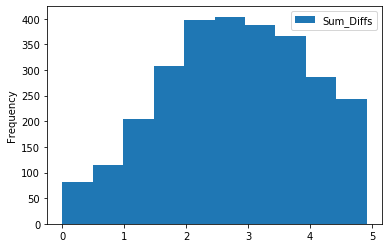

In [102]:
super_matches.plot(kind="hist")

In [84]:
matches_df.sort_values(["Sum_Diffs", "Pattern_Generating_Match"], ascending=False)

,Pattern_Generating_Match,Duration_Ratio_1,Duration_Ratio_2,Sum_Diffs
1535,"[-3, 2, 2, -2]","[0.5, 1.0, 3.0, 0.16666666666666666]","[1.0, 4.0, 1.0, 8.0]",13.333333
1580,"[-3, 2, 2, -2]","[1.0, 4.0, 1.0, 8.0]","[0.5, 1.0, 3.0, 0.16666666666666666]",13.333333
1463,"[-3, 2, 1, -2]","[0.5, 1.0, 3.0, 0.16666666666666666]","[1.0, 4.0, 1.0, 8.0]",13.333333
1492,"[-3, 2, 1, -2]","[1.0, 4.0, 1.0, 8.0]","[0.5, 1.0, 3.0, 0.16666666666666666]",13.333333
1233,"[-2, 2, 2, -3]","[0.5, 1.0, 3.0, 0.16666666666666666]","[1.0, 4.0, 1.0, 8.0]",13.333333
...,...,...,...,...
887,"[-2, 1, -2, -2]","[0.5, 1.5, 0.3333333333333333, 2.0]","[0.5, 1.5, 0.3333333333333333, 2.0]",0.000000
300,"[-2, -2, -2, 4]","[1.0, 0.5, 1.0, 2.0]","[1.0, 0.5, 1.0, 2.0]",0.000000
195,"[-2, -2, -2, 2]","[1.0, 0.5, 1.0, 2.0]","[1.0, 0.5, 1.0, 2.0]",0.000000
84,"[-2, -2, -2, 1]","[1.0, 0.5, 1.0, 2.0]","[1.0, 0.5, 1.0, 2.0]",0.000000


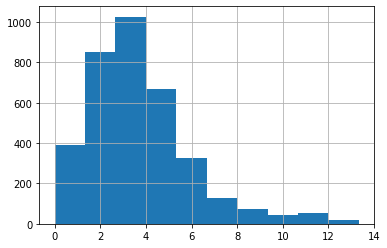

In [76]:
matches_df.Sum_Diffs.hist()

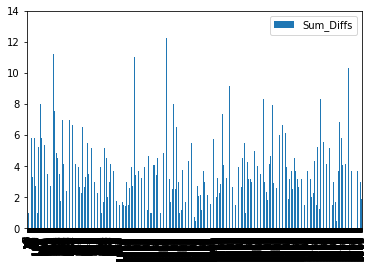

In [77]:
plotdata = matches_df
plotdata.plot(kind="bar")

In [11]:
matches_df['Part'] = results.Part
matches_df['Piece_Title'] = results.Piece_Title
matches_df.head()



,Pattern_Generating_Match,Duration_Ratio_1,Duration_Ratio_2,Sum_Diffs,Part,Piece_Title
0,"[-2, -2, -2, -2]","[0.3333333333333333, 2.0, 2.0, 1.0]","[2.0, 2.0, 1.0, 0.5]",3.166667,Superius,Missa Confitemini Kyrie
1,"[-2, -2, -2, -2]","[0.3333333333333333, 2.0, 2.0, 1.0]","[0.5, 1.0, 2.0, 0.5]",1.666667,Superius,Missa Confitemini Kyrie
2,"[-2, -2, -2, -2]","[0.3333333333333333, 2.0, 2.0, 1.0]","[0.3333333333333333, 2.0, 0.5, 1.0]",1.500000,Contratenor,Missa Confitemini Kyrie
3,"[-2, -2, -2, -2]","[0.3333333333333333, 2.0, 2.0, 1.0]","[0.3333333333333333, 2.0, 0.5, 1.0]",1.500000,Contratenor,Missa Confitemini Kyrie
4,"[-2, -2, -2, -2]","[0.3333333333333333, 2.0, 2.0, 1.0]","[0.3333333333333333, 1.0, 0.5, 1.0]",2.500000,Contratenor,Missa Confitemini Kyrie


In [12]:
matches_df.Part.hist()

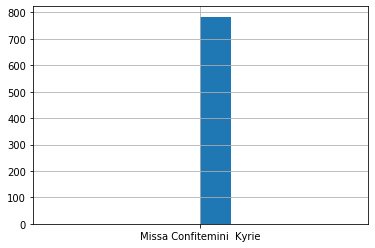

In [13]:
matches_df.Piece_Title.hist()

### Test Data

In [ ]:
ratios_1 = [3, 5, 2, 6, 4] 
ratios_2 = [7, 3, 4, 1, 5] 


compare_ratios(ratios_1, ratios_2)